In [3]:
import pandas as pd

# Lire les données du fichier Excel
df = pd.read_excel('data-sell4all.xlsx')

# Afficher les 5 premières lignes
df.head()

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30


In [5]:
# Afficher un résumé technique des données
df.info()

# Afficher des statistiques descriptives pour les données numériques
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  62 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  63 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


,Pays,Age,Genre,Dépenses des clients
count,65,62,64,63
unique,20,40,12,59
top,France,28,Female,195.25
freq,10,3,27,2


In [15]:
print(df[' Age '].dtype)
print(df[' Age '].unique())  # Affiche toutes les valeurs uniques de la colonne

object
[32 45 28 39 52 22 36 41 29 48 35 27 50 33 44 31 38 26 47 30 42 55 25 49
 34 40 23 51 37 43 46 nan 53 -100 150 1000 11 0 '∞' '25;30'
 'Not Available']


In [17]:
df['Age'] = pd.to_numeric(df[' Age '], errors='coerce')

In [19]:
df['Age'].dropna(inplace=True)  # Supprime les lignes avec des NaN dans 'Age'

In [21]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()

print(f"Moyenne de l'âge : {age_mean}")
print(f"Médiane de l'âge : {age_median}")

Moyenne de l'âge : 52.42372881355932
Médiane de l'âge : 36.0


In [25]:
print(df['Dépenses des clients'].dtype)
print(df['Dépenses des clients'].unique())  # Affiche les valeurs uniques pour détecter les anomalies

object
['150.50' '200.75' '75.25' '180.00' '250.30' '90.00' '175.50' '120.75'
 '95.25' '220.00' '160.25' '85.50' '190.75' '140.00' '210.50' '130.25'
 '170.00' '5.75' '200.25' '110.50' '180.75' '100.25' '230.00' '150.75'
 '80.50' '215.25' '145.00' '70.25' '240.75' '165.00' '195.25' '85.75'
 '205.50' '135.25' '120.00' '225.75' '155.50' '90.25' '210.00' '170.25'
 '125.75' '190.00' '75.50' '220.25' '160.75' '185.00' '105.25' '235.50'
 '140.25' nan '145.75' '999999.99' '0.01' '500.00' '100 Galleons'
 '50 Turkish Delights' '1010101.01' 'π' '100+200' 'Priceless']


In [27]:
df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'], errors='coerce')

In [29]:
df.dropna(subset=['Dépenses des clients'], inplace=True)

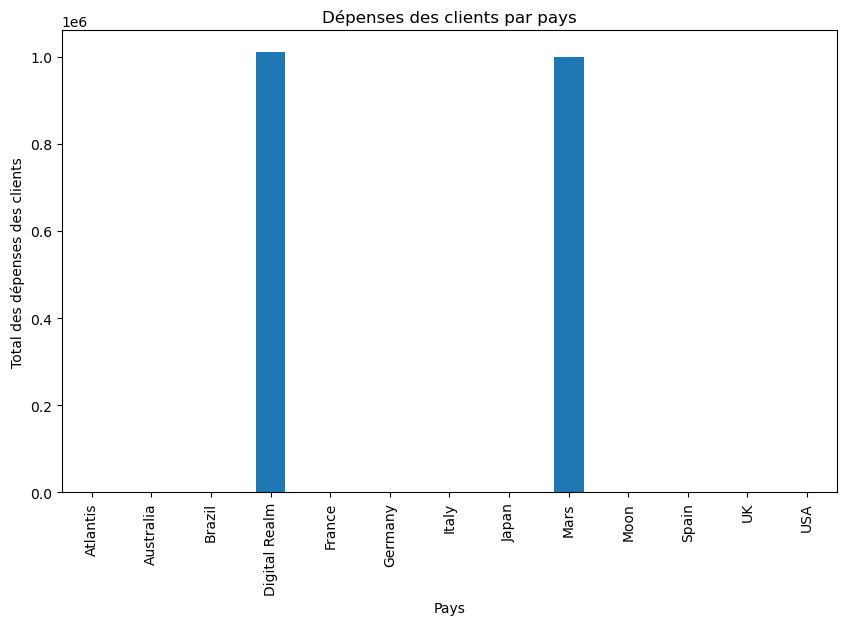

In [31]:
import matplotlib.pyplot as plt

# Créer un graphique à barres des dépenses des clients par pays
df.groupby('Pays')['Dépenses des clients'].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Dépenses des clients par pays')
plt.xlabel('Pays')
plt.ylabel('Total des dépenses des clients')
plt.show()

In [33]:
df_cleaned = df[df['Dépenses des clients'] >= 10]


In [35]:
df_cleaned = df_cleaned.drop_duplicates()


In [39]:
# Enregistrer les données nettoyées dans un nouveau fichier Excel
df_cleaned[['Pays', ' Age ', 'Genre', 'Dépenses des clients']].to_excel('data-sell4all-cleaned.xlsx', index=False)
